In [13]:
from scipy import signal, stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook 

In [14]:
## sampling rate of ganglion is 200Hz
fs = 200.0 

In [15]:
def extract_data(fname):
    d = pd.read_csv(fname)
    eeg = np.array(d.ix[:, 1:5])
    tag = np.array(d.Marker)
    start = np.where(tag == 1)[0][0]
    end = np.where(tag == 2)[0][0]
    eeg = eeg[start:end]
    return eeg, start, end

In [16]:
## get data
eeg1, start1, end1 = extract_data('../data/data_sintel_pierre_2.csv')
eeg2, start2, end2 = extract_data('../data/data_sintel_pierre_3.csv')

In [17]:
print start1, end1
print start2, end2

242 10786
111 10642


In [18]:
## data may be off by a few samples, so need to align
N_samp = min(len(eeg1), len(eeg2))
print 'N_samp:', N_samp
eeg1 = eeg1[:N_samp]
eeg2 = eeg2[:N_samp]

N_samp: 10531


In [19]:
## filter signal to remove noise
b, a = signal.butter(2, (2/fs, 30/fs), btype='bandpass')
eeg1 = signal.filtfilt(b, a, eeg1, axis=0)
eeg2 = signal.filtfilt(b, a, eeg2, axis=0)

In [20]:
## advance window of 200 samples
## take correlation between signals across each sample
window = 200
step = 25
corr = []
padded_corr = []
times = []

for start in np.arange(0, N_samp, step):
    end = start + window
    w1 = eeg1[start:end]
    w2 = eeg2[start:end]
    
    ## average the correlation across each channel
    r = 0
    for c in range(w1.shape[1]):
        r += stats.pearsonr(w1[:, c], w2[:, c])[0]
    r /= w1.shape[1]
    
    mid = (start+end)/2 # middle sample
    t = mid / fs # convert middle sample to time
    
    
    times.append(t)
    corr.append(r)
    padded_corr.extend([r for _ in range(step)])

times = np.array(times)
corr = np.array(corr)

<IPython.core.display.Javascript object>


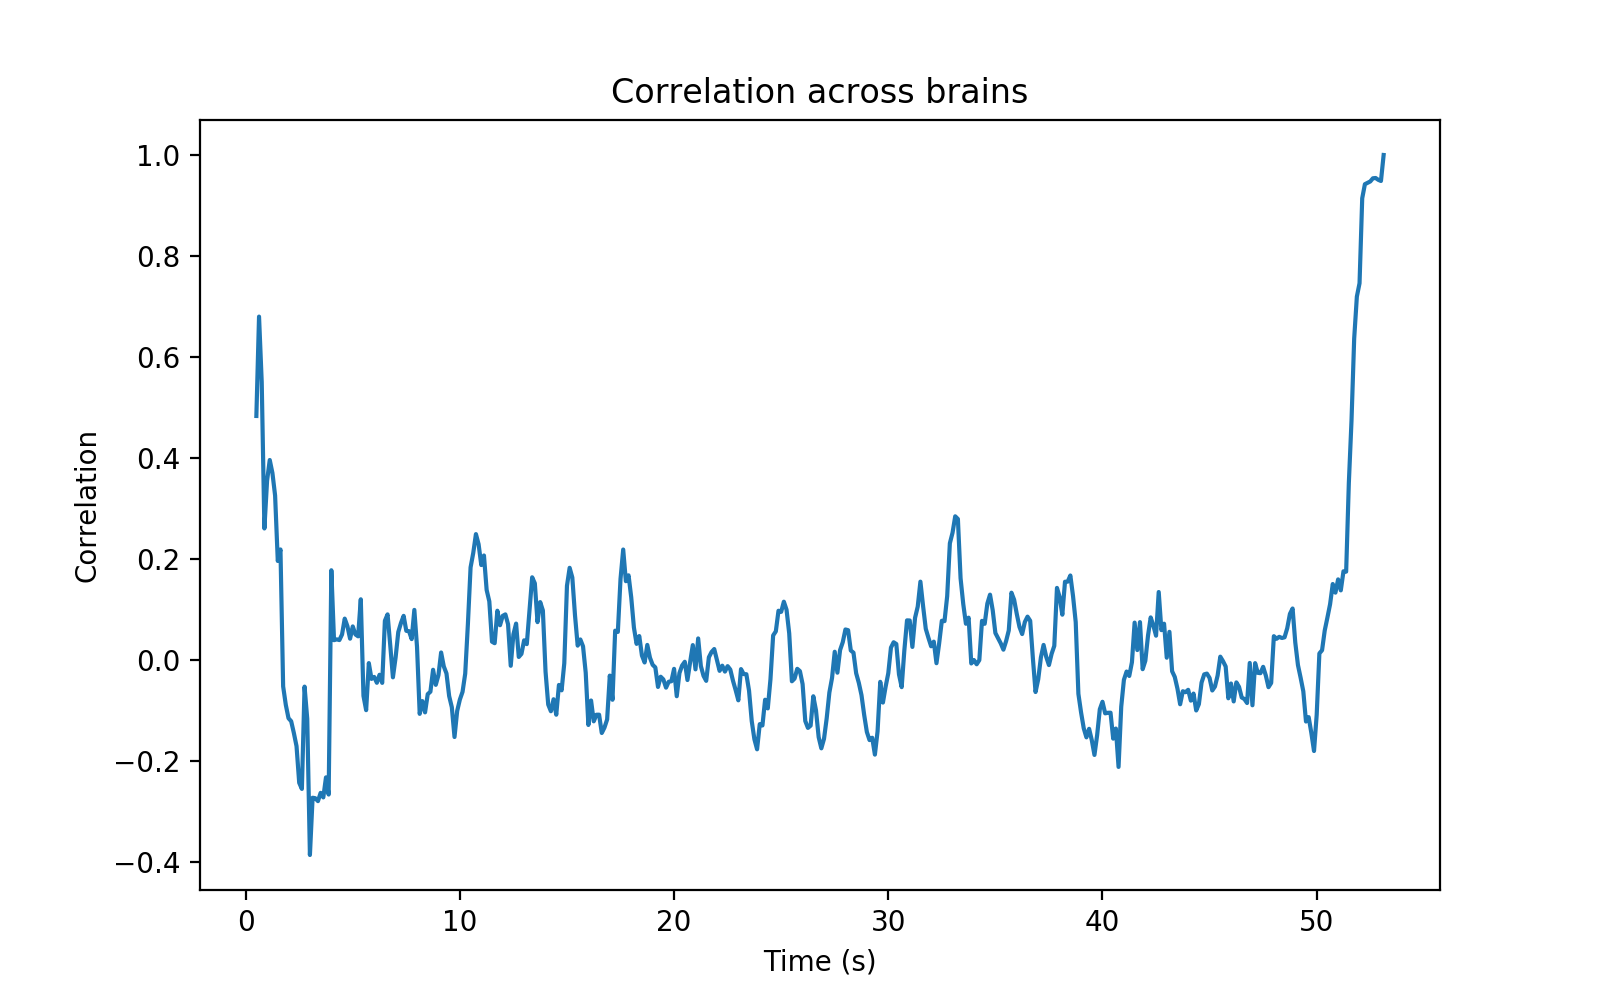

In [23]:
plt.figure(figsize=(8,5))
plt.plot(times, corr)
plt.xlabel('Time (s)')
plt.ylabel('Correlation')
_ = plt.title('Correlation across brains')

<IPython.core.display.Javascript object>


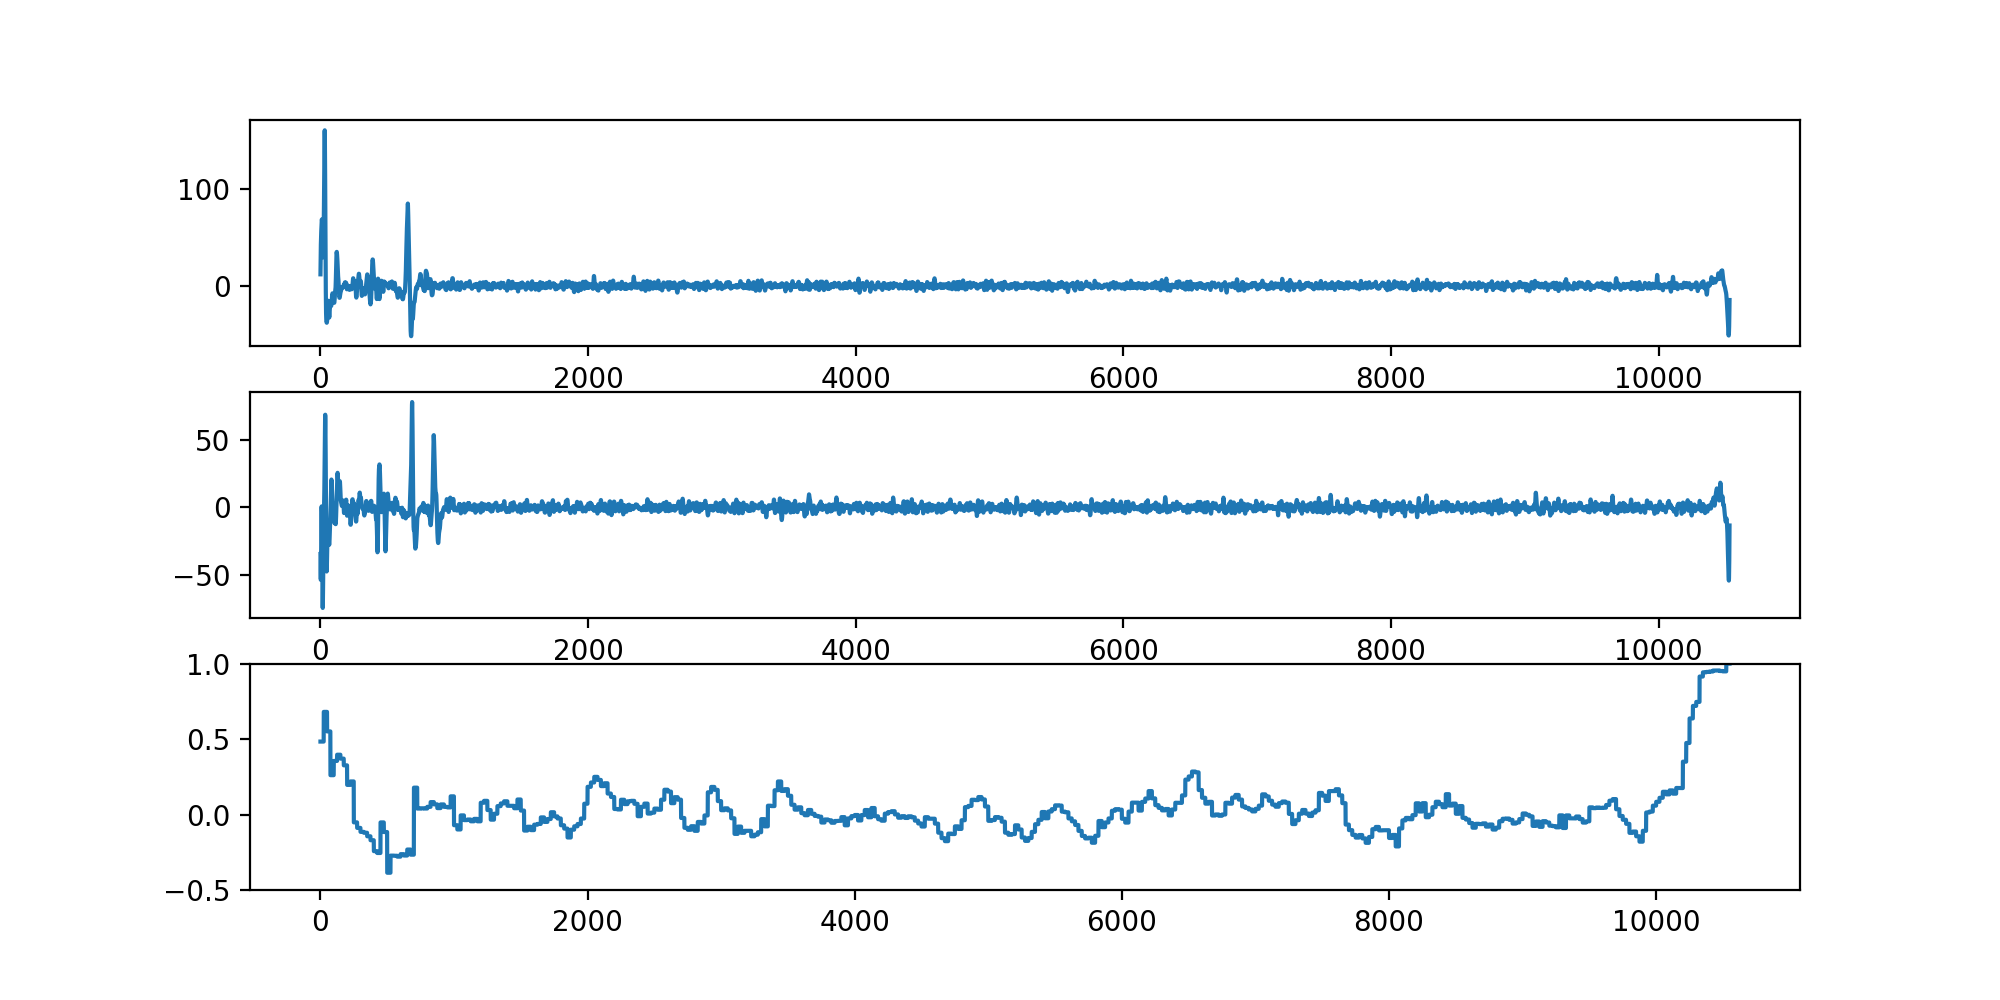

(-0.5, 1)

In [22]:
f, ax = plt.subplots(3, figsize=(10,5))
ax[0].plot(eeg1[:, 0], label="eeg1")
ax[1].plot(eeg2[:, 0], label="eeg2")
ax[2].plot(padded_corr)
# ax[0].set_ylim(-10, 10)
# ax[1].set_ylim(-10, 10)
ax[2].set_ylim(-0.5, 1)
# ax[0].set_xlim(0, 5000)
# ax[1].set_xlim(0, 5000)
# ax[2].set_xlim(0, 5000)

# Marion's notes

In [ ]:
df1 = pd.read_csv('../data/data_sintel_pierre_2.csv')

In [ ]:
df2 = pd.read_csv('../data/data_sintel_pierre_3.csv')

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
start1 = df1[df1.Marker==1].index.values[0]
end1 = df1[df1.Marker==2].index.values[0]
start2 = df2[df2.Marker==1].index.values[0]
end2 = df2[df2.Marker==2].index.values[0]
print start1, end1
print start2, end2

In [ ]:
raw_eeg1 = df1.ix[start1:end1, 1:5]
raw_eeg2 = df2.ix[start2:end2, 1:5]

N_samp = min(len(raw_eeg1), len(raw_eeg2))
raw_eeg1 = raw_eeg1[:N_samp]
raw_eeg2 = raw_eeg2[:N_samp]

In [ ]:
raw_eeg1.head()

In [ ]:
# def auto_correlation(epoch):
#     count = epoch.shape[1] - int(constants.F_EMG)*4
#     offset = int(constants.F_EMG)/2
#     steps = int(constants.F_EMG)/20
#     auto_correlation_values = []
#     for i in range(offset, count, steps):
#         E1 = epoch[:, :  -count]
#         E2 = epoch[:,i:+i-count]
#         EE12 = np.square(np.mean(E1*E2))
#         E1E2 = (np.mean(E1*E1)*np.mean(E2*E2))
#         auto_correlation_values.append(EE12 / E1E2 if E1E2 != 0 else 0)
#     result = np.asarray(auto_correlation_values)
#     result_idx = auto_correlation_highest_index(result)
#     if result_idx is None:
#         return result, None
#     result[result_idx] = 0
#     return result, result_idx

# def auto_correlation_highest_index(input_ac):
#     ac = np.copy(input_ac)
#     ac[ac<.3] = 0
#     ac_range = np.max(ac)
#     if ac_range > 0:
#         ac = ac/ac_range
#     ac = np.where(ac > .7, 1, 0)
#     ac_diff = np.diff(ac)
#     ac_idx = np.argwhere(ac_diff == 1)
#     if len(ac_idx) == 0:
#         return None
#     return ac_idx[0]


In [ ]:
## advance window of 200 samples
## take correlation between signals across each sample
window = 200
step = 25
corr = []
for start in np.arange(0, N_samp, step):
    end = start + window
    w1 = eeg1[start:end]
    w2 = eeg2[start:end]
    
    ## average the correlation across each channel
    r = 0
    for c in range(w1.shape[1]):
        r += stats.pearsonr(w1[:, c], w2[:, c])[0]
    r /= w1.shape[1]
    corr.extend([r for _ in range(step)])

corr = np.array(corr)
print len(eeg1)
print len(corr)

In [ ]:
f, ax = plt.subplots(3, figsize=(10,5))
#ax[0].plot(raw_eeg1.ix[:, 0].values, label="raw_eeg1")
ax[0].plot(eeg1[:, 0], label="eeg1")
#ax[1].plot(raw_eeg2.ix[:, 0].values, label="raw_eeg2")
ax[1].plot(eeg2[:, 0], label="eeg2")
ax[2].plot(corr)